In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0,0.5,'$x2$')

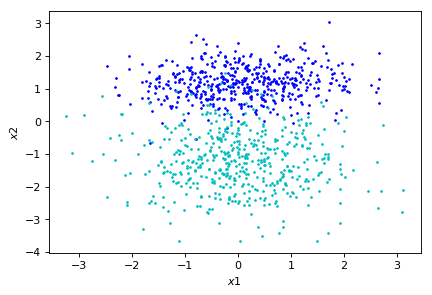

In [2]:
from sklearn.datasets import make_classification
n_samples=1000
x,y = make_classification(n_samples=n_samples,n_features=2,\
n_informative=1,n_redundant=0,n_repeated=0,n_classes=2,n_clusters_per_class=1,class_sep=1.2)
y=np.array(list(map(lambda yi: 1 if yi==1 else -1, y)))
px=np.array([x[i] for i in range(n_samples) if y[i]==1])
nx=np.array([x[i] for i in range(n_samples) if y[i]==-1])
plt.figure(dpi=80)
plt.scatter(px[:,0],px[:,1],s=2,color='b')
plt.scatter(nx[:,0],nx[:,1],s=2,color='c')
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')

In [3]:
#训练数据和测试数据
x_train = x[:800]
x_test = x[800:]
y_train = y[:800]
y_test = y[800:]

[0.06930405 1.53908943] 0.0


Text(0,0.5,'$x2$')

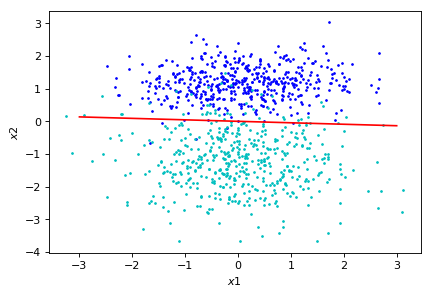

In [4]:
#自己写的原始形式的感知机（练习用）
def my_orgin_pc(x_train,y_train,learning_rate=1,w=np.zeros(2),b=0,max_iter=100):
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    w=np.array(w)
    for _ in range(max_iter):
        flag=0
        for xi,yi in zip(x_train,y_train):
            if yi*(np.dot(xi,w)+b)<=0:#误分类点的判定条件
                w=w+learning_rate*yi*xi#梯度下降
                b=b+learning_rate*yi#梯度下降
                flag=1
        if flag==0:
            break
    return w,b
w,b=my_orgin_pc(x_train,y_train,max_iter=1000,learning_rate=0.5)
print(w,b)
x1=np.linspace(-3,3,100)
x2=(-b-w[0]*x1)/w[1]
plt.figure(dpi=80)
plt.scatter(px[:,0],px[:,1],s=2,color='b')
plt.scatter(nx[:,0],nx[:,1],s=2,color='c')
plt.plot(x1,x2,color='red')
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')

[0.32164449 0.90555096] -13259.0


Text(0,0.5,'$x2$')

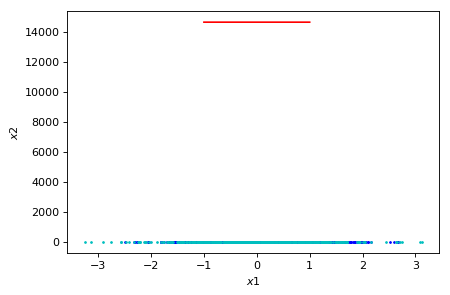

In [5]:
#自己写的对偶形式的感知机（练习用）
def my_cp_pc(x_train,y_train,learning_rate=1,alpha=None,b=0,max_iter=100):
    if alpha==None:
        alpha=np.zeros(len(x_train))
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    Gram=np.dot(x_train, x_train.T)
    for _ in range(max_iter):
        flag=0
        for i in range(len(x_train)):
            s=0
            if y_train[i]*(np.sum(alpha*y_train*Gram[:,i]))<=0:
                alpha[i]=alpha[i]+learning_rate
                flag=1
        if flag==0:
            break
    w=np.sum((alpha*y_train).reshape(len(y_train),1)*x_train,axis=0)
    b=np.sum(alpha*y_train)
    return w,b

w,b=my_cp_pc(x_train,y_train,max_iter=1000,learning_rate=0.5)
print(w,b)
x1=np.linspace(-1,1,100)
x2=(-b-w[0]*x1)/w[1]
plt.figure(dpi=80)
plt.scatter(px[:,0],px[:,1],s=2,color='b')
plt.scatter(nx[:,0],nx[:,1],s=2,color='c')
plt.plot(x1,x2,color='red')
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')

[-0.72650623  3.53629857] 0.0
0.95


/home/zdk/software/Anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


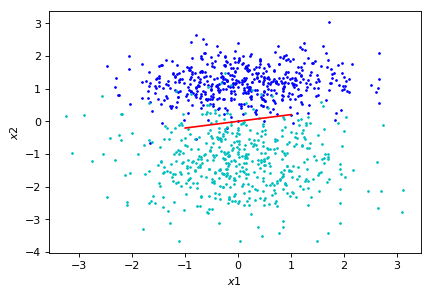

In [6]:
#使用sklearn定义感知机
from sklearn.linear_model import Perceptron
pc = Perceptron()
#使用训练数据进行训练
pc.fit(x_train,y_train)
w=pc.coef_[0]
b=pc.intercept_[0]
print(w,b)
x1=np.linspace(-1,1,100)
x2=(-b-w[0]*x1)/w[1]
plt.figure(dpi=80)
plt.scatter(px[:,0],px[:,1],s=2,color='b')
plt.scatter(nx[:,0],nx[:,1],s=2,color='c')
plt.plot(x1,x2,color='red')
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')
#利用测试数据进行验证
acc = pc.score(x_test,y_test)
print(acc)